In [137]:
#start by importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

**1. Data Understanding**

In [139]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
df.shape

(1460, 81)

In [141]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

With 81 columns in the dataset, simplifying the number of features before visualizing the data will help improve our understanding of the data.

In [142]:
#segment numerical and categorical variables from the dataset for improved analysis
numerical_variables = df.select_dtypes(include=np.number).columns
categorical_variables = df.select_dtypes(exclude=np.number).columns

print(numerical_variables)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [143]:
print(categorical_variables)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


Immediately, we can drop the ID column to simplofy our dataset. We may also want to research MiscVal, MoSold, YrSold, and MiscFeature for potential high colinearity, low relevance to the ML system, and missing values.

In [144]:
#create a list of percent of missing values by column
missing_percentage = (df.isnull().sum()/len(df))*100

missing_report = pd.DataFrame({
    "Percent Missing": missing_percentage.sort_values(ascending=False)
})

missing_report.head(10)

,Percent Missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945


We will drop columns with more than 70% missing values, and any irrelevant columns before proceeding with visualization.

In [145]:
df = df.drop(['Id', 'MiscVal', 'MoSold', 'YrSold', 'MiscFeature', 'PoolQC', 'Alley','Fence'], axis=1)

In [146]:
df.columns #verify columns were dropped

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

Begin visualizations, starting with histograms for all the numerical features.

In [147]:
numerical_variables = df.select_dtypes(include=np.number).columns #update ongoing list of numerical variables now that some columns have been dropped

numerical_variables

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

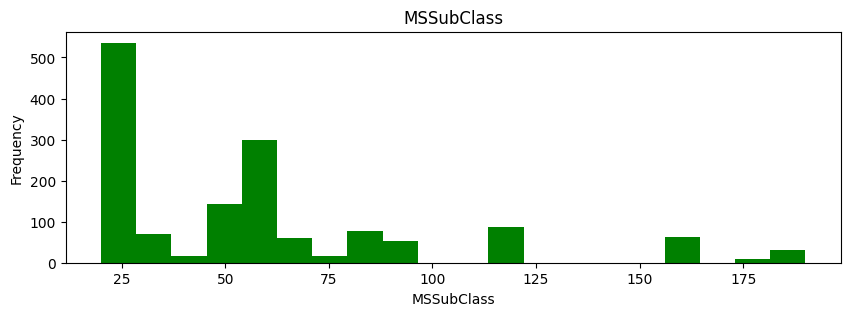

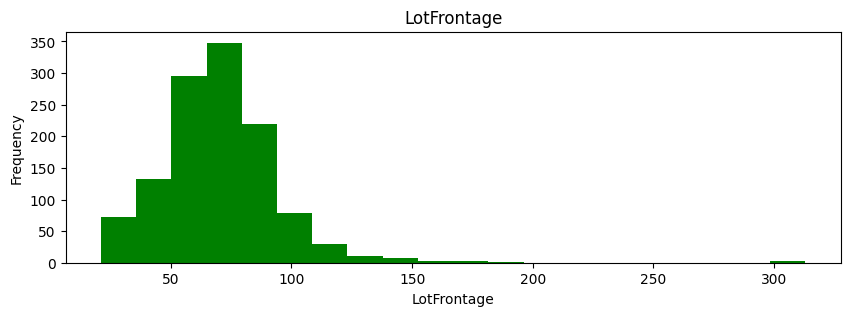

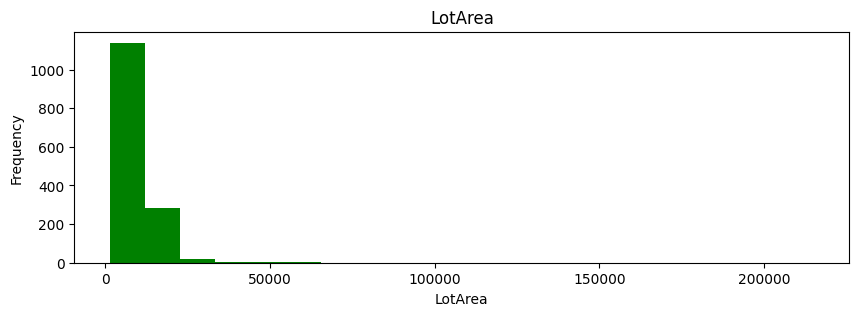

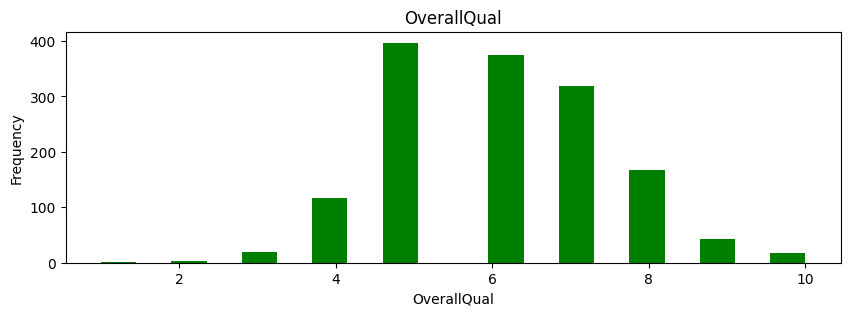

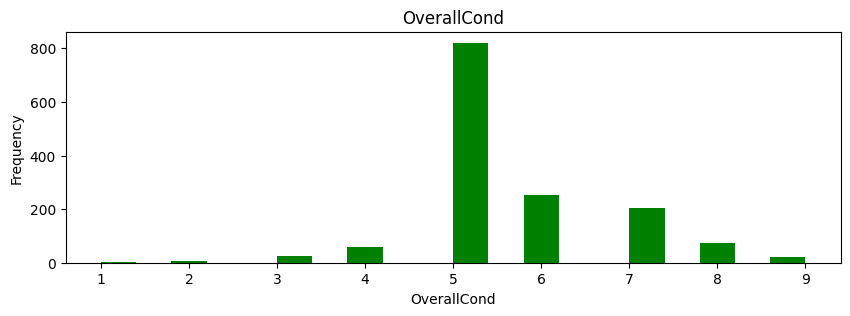

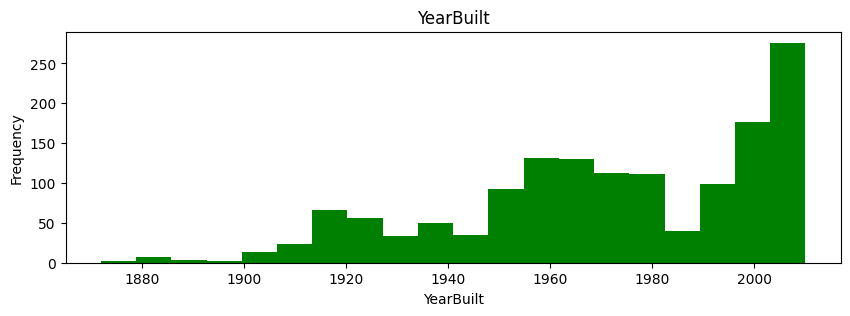

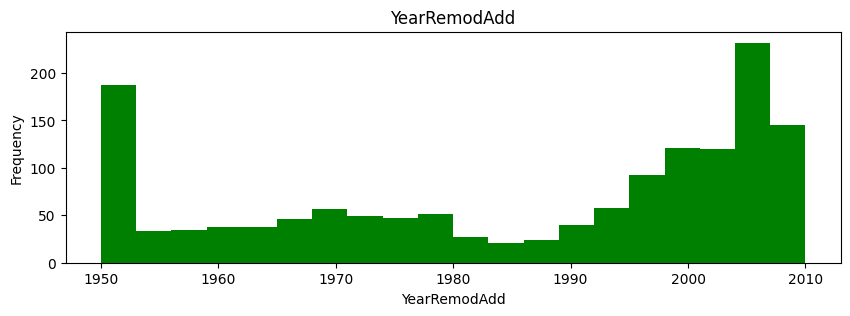

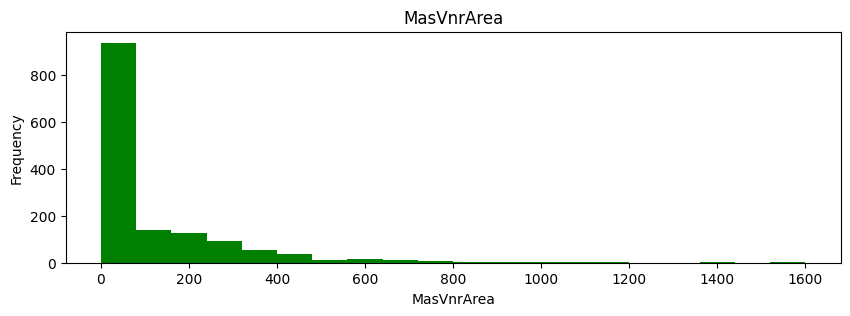

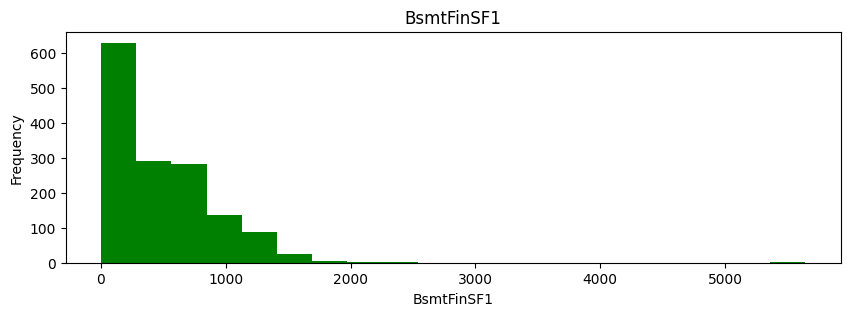

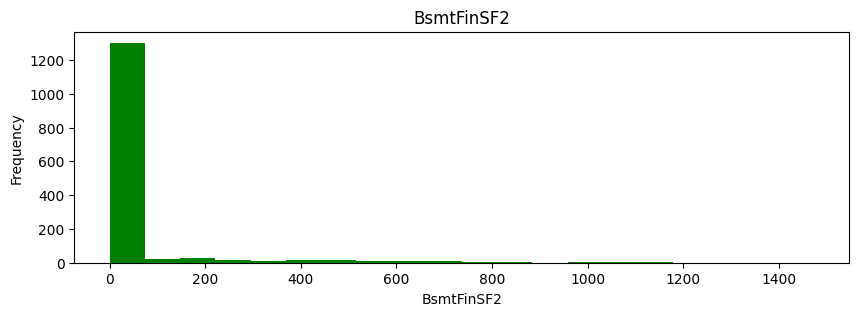

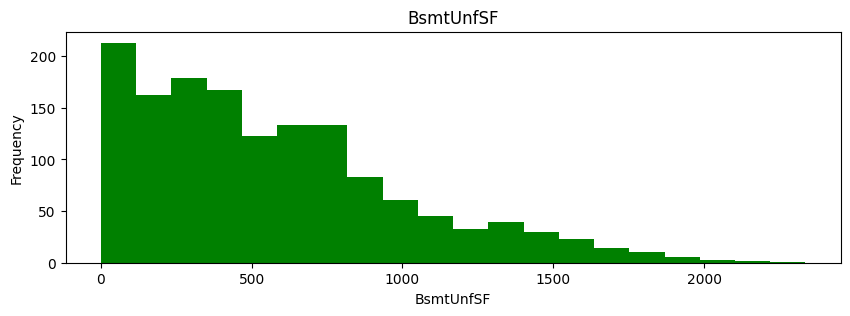

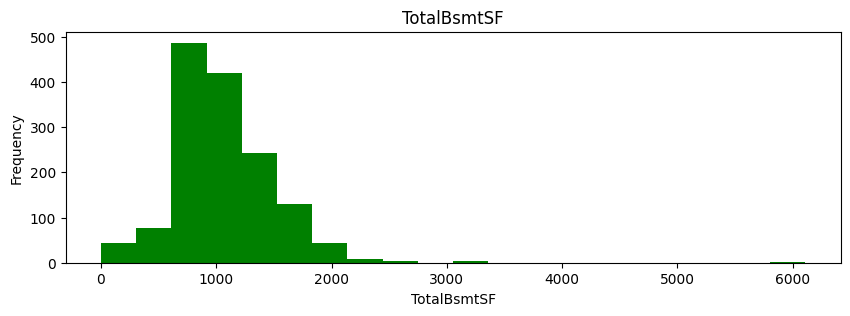

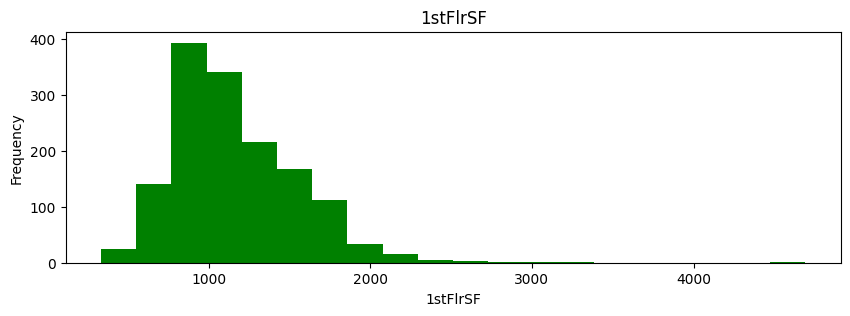

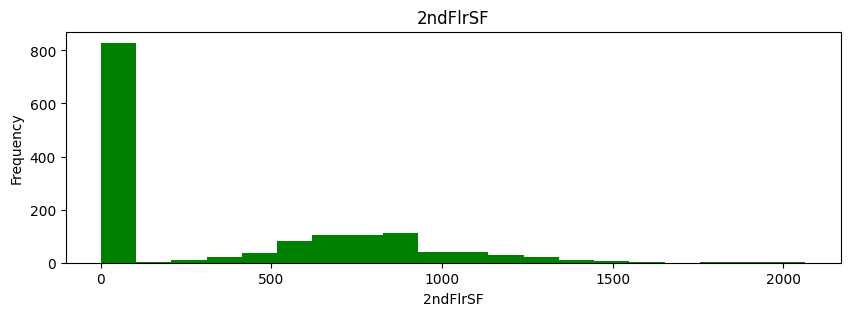

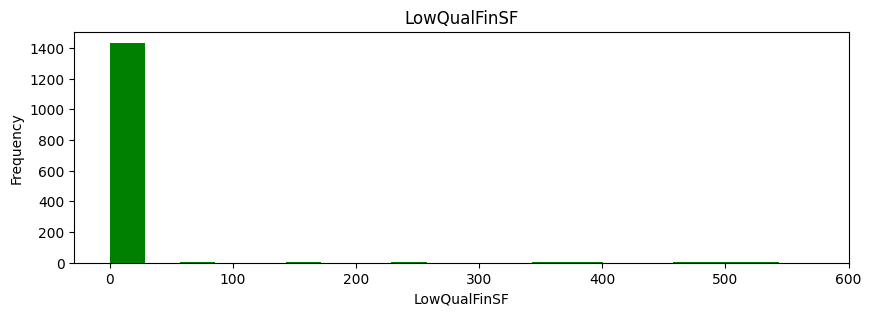

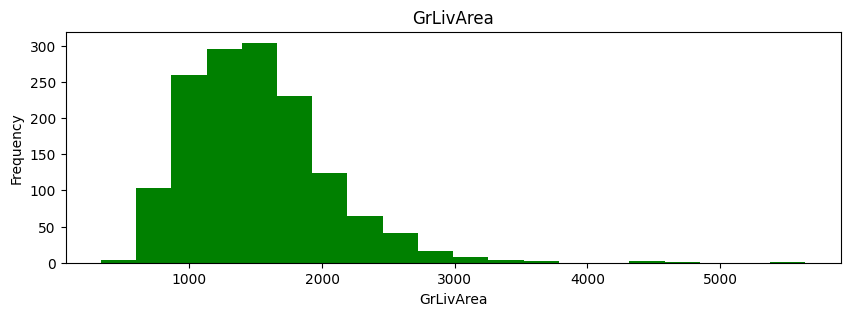

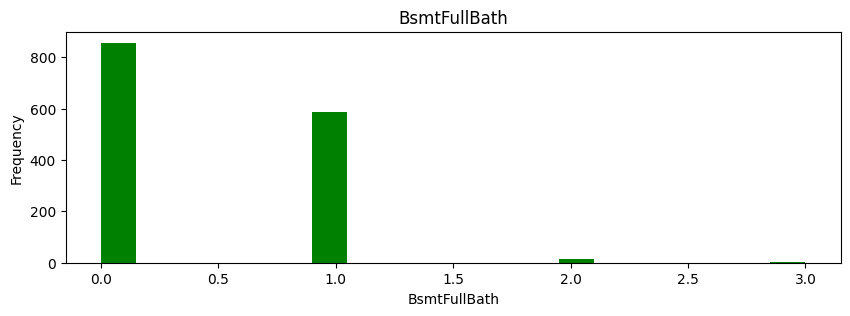

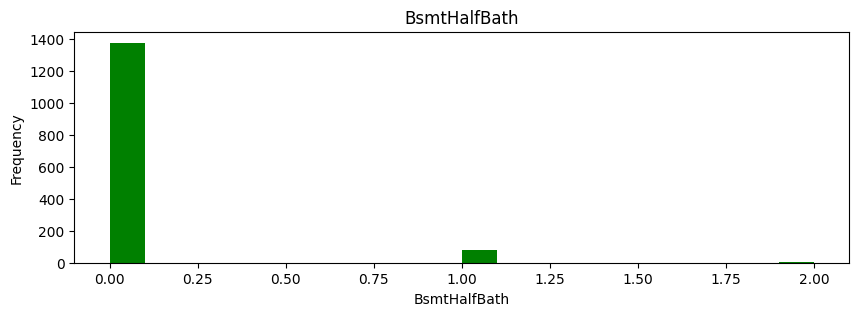

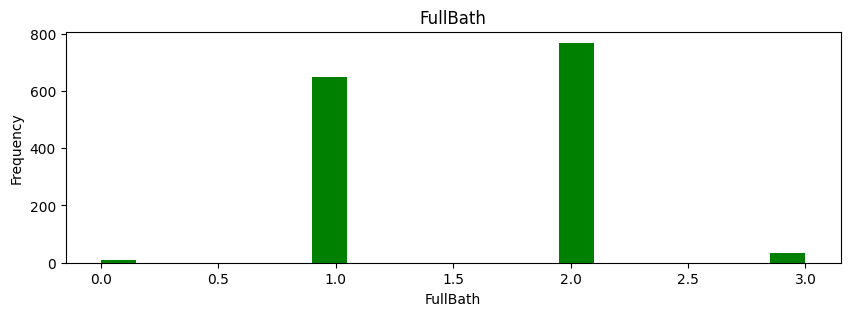

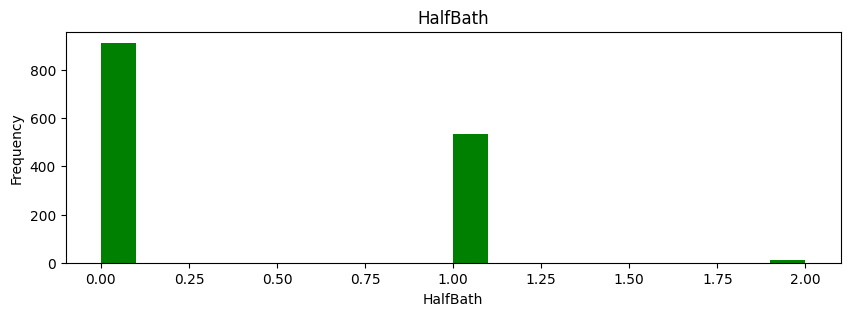

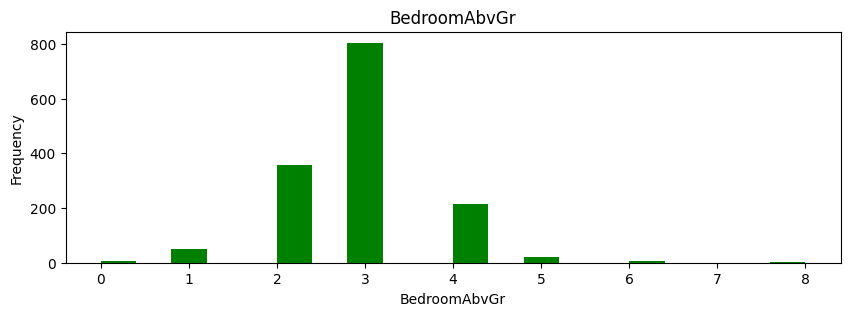

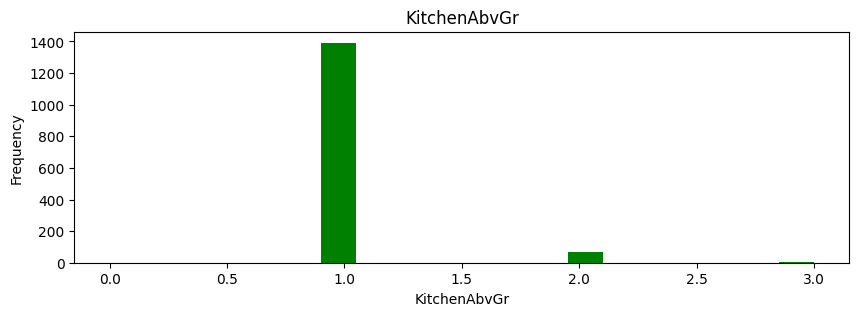

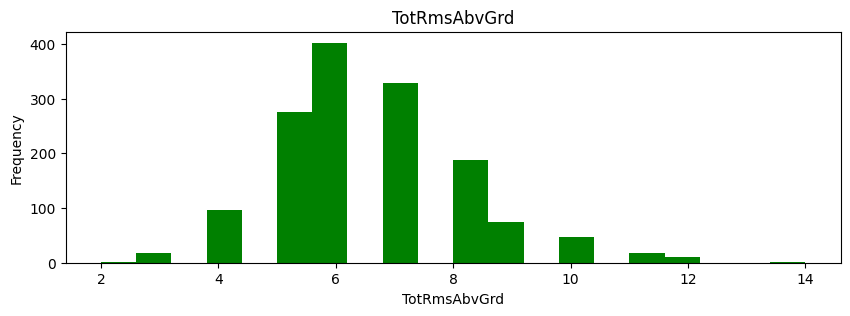

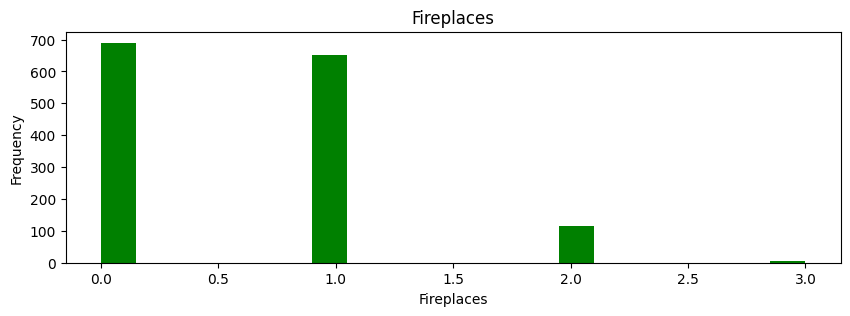

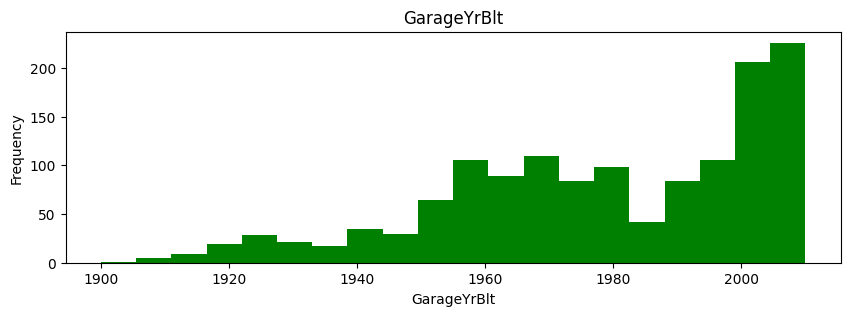

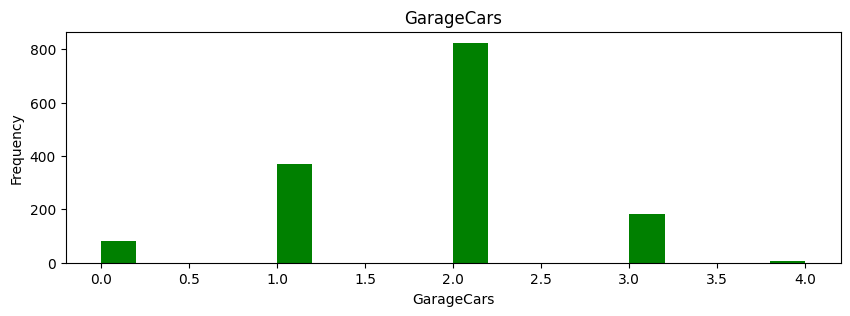

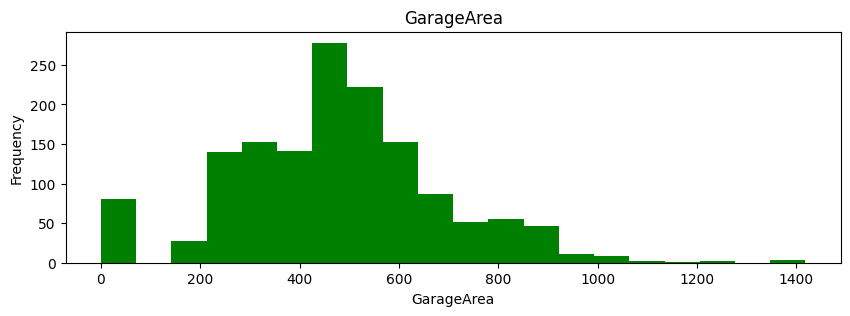

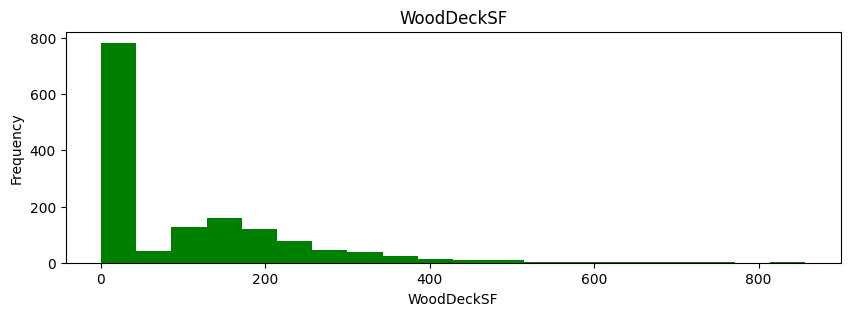

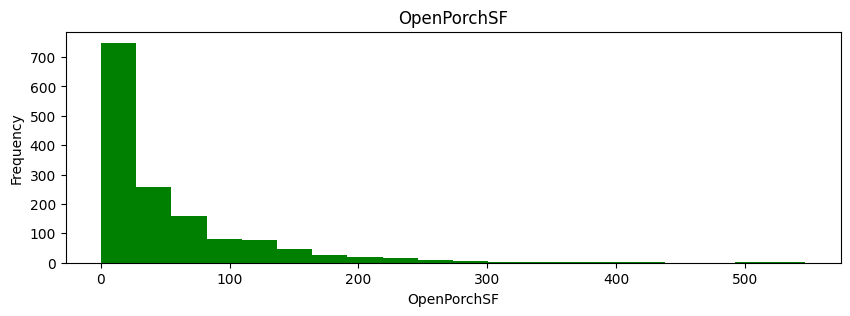

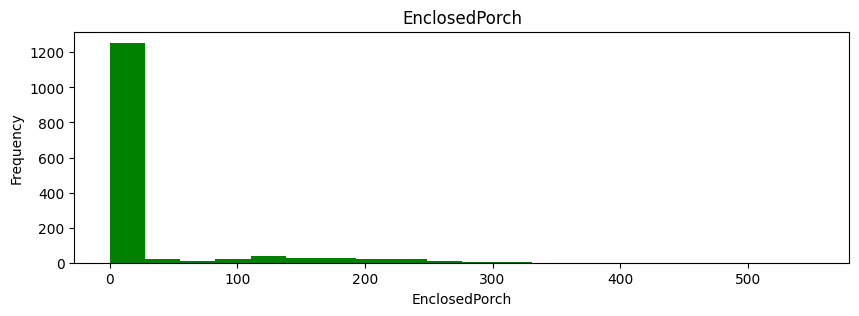

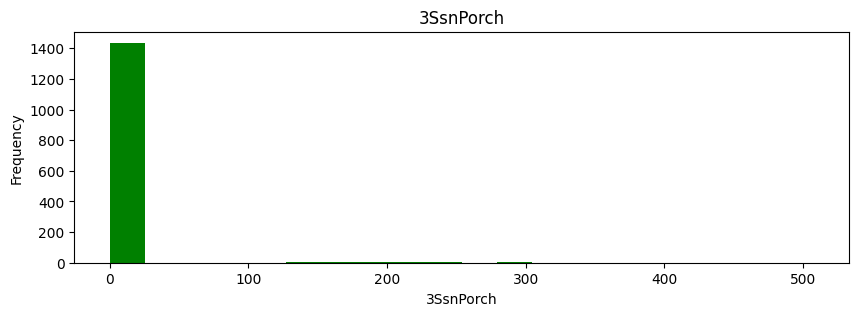

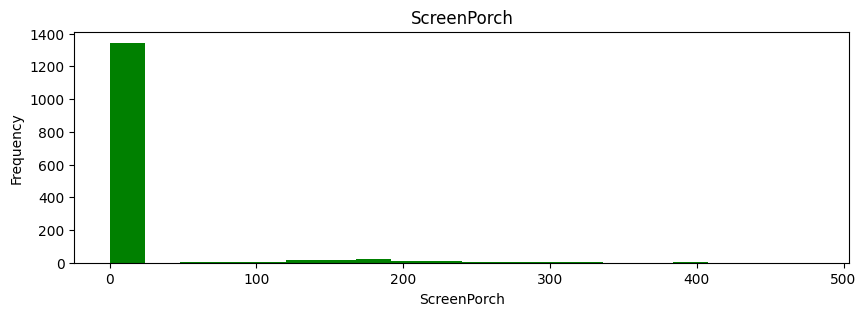

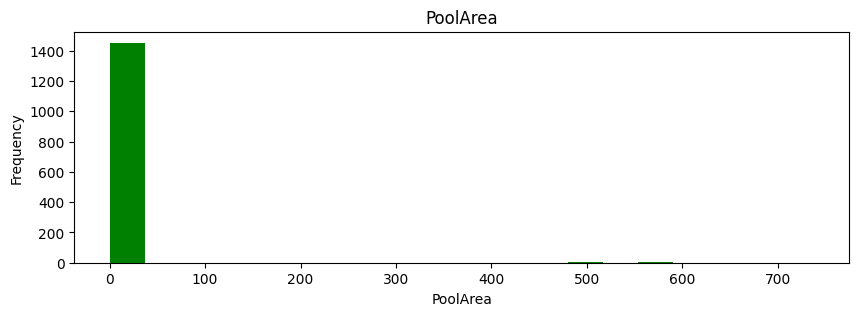

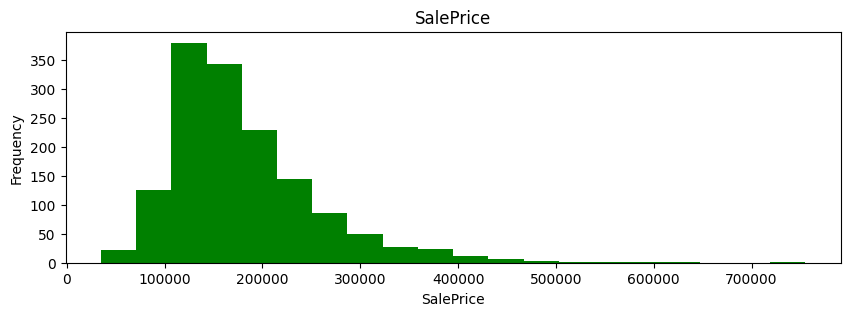

In [148]:
for col in numerical_variables: #create for loop to create histogram for every numerical variable in dataset
  plt.figure(figsize=(10,3))
  plt.hist(df[col], bins=20, color = 'green')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

From these histograms, we can observe the following trends in the numerical variables:

*   SalePrice, LotArea, and GrLivArea seem to be right-skewed distributions.
*   LotArea specifically may have a large number of outliers, since very few values extend far into the right region of the histogram.
* Overall Quality is normally distributed.

Let's repeat visualizations for categorical variables through the use of bar plots.



In [149]:
categorical_variables = df.select_dtypes(exclude=np.number).columns

categorical_variables

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

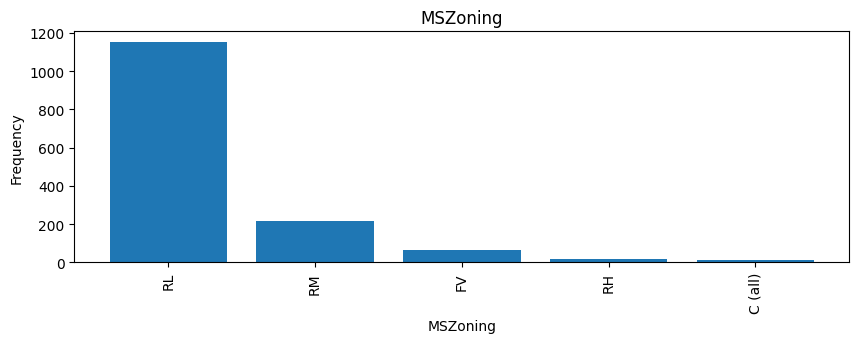

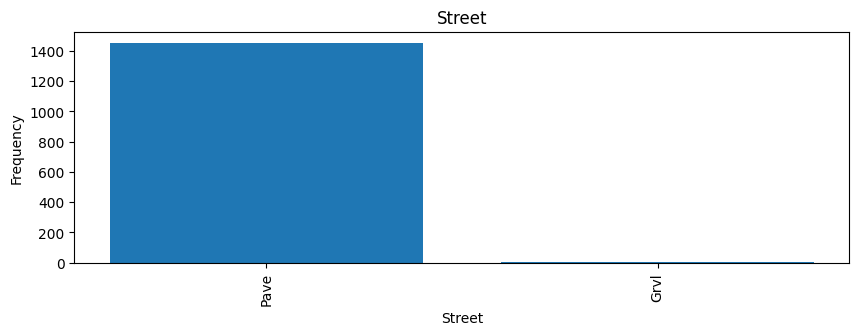

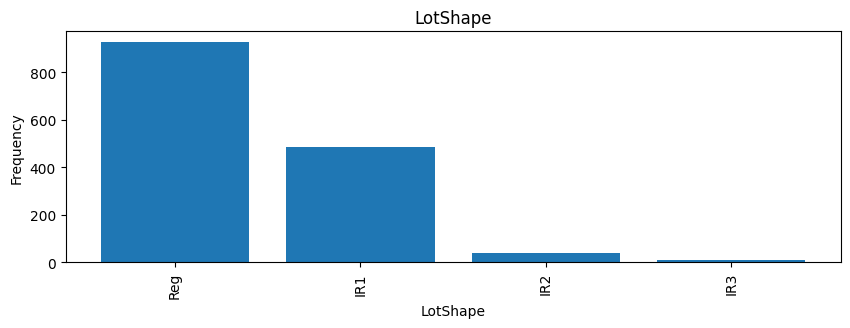

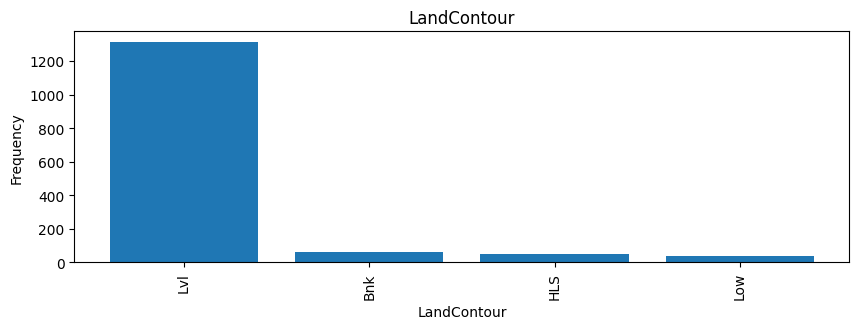

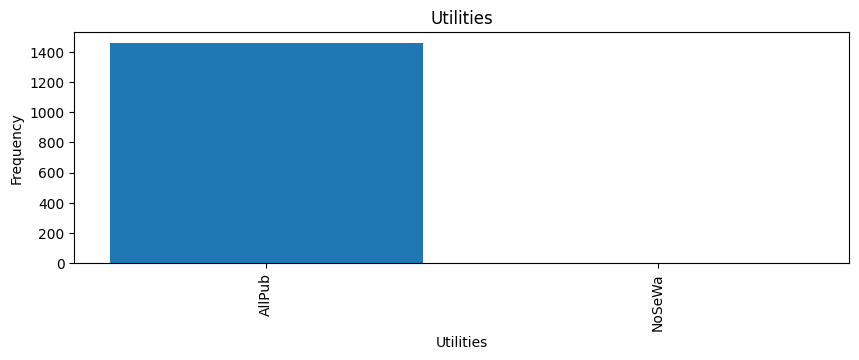

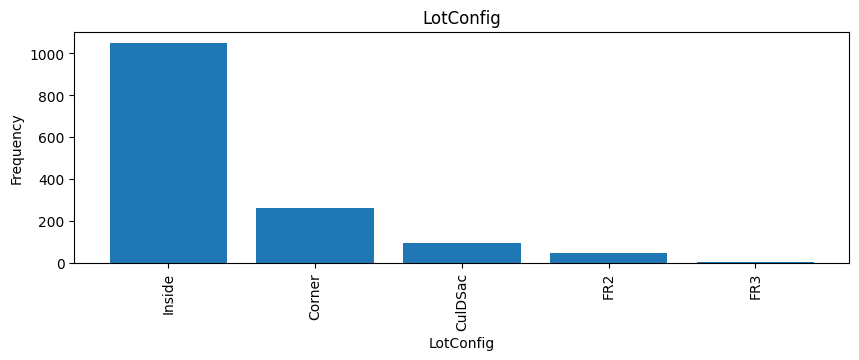

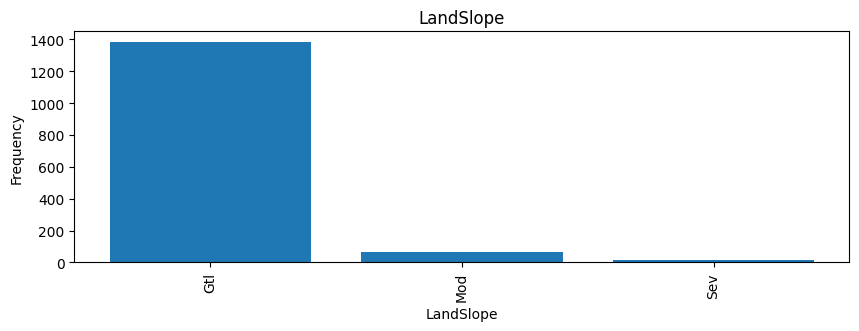

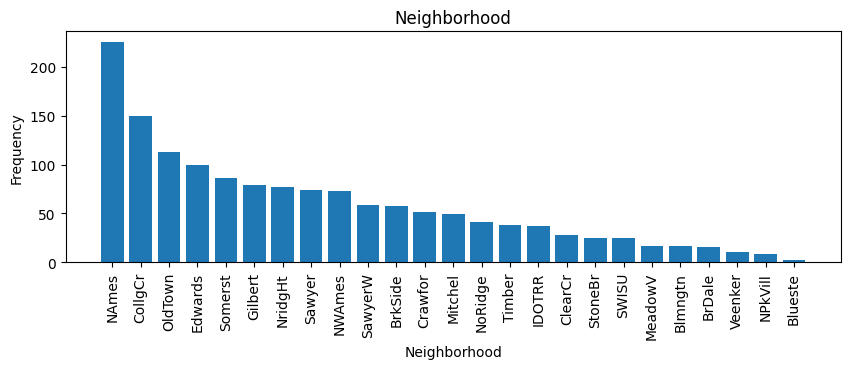

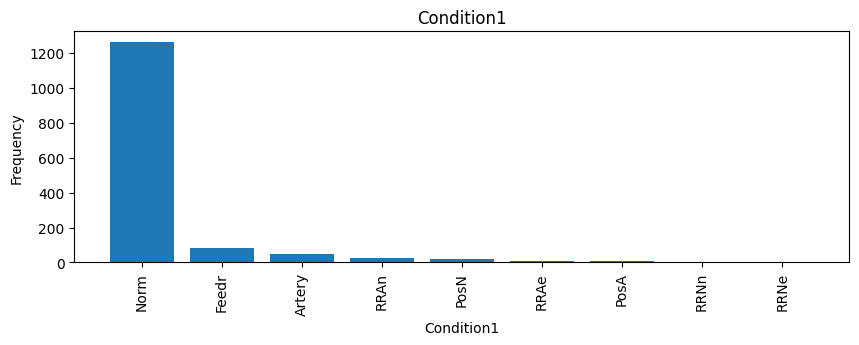

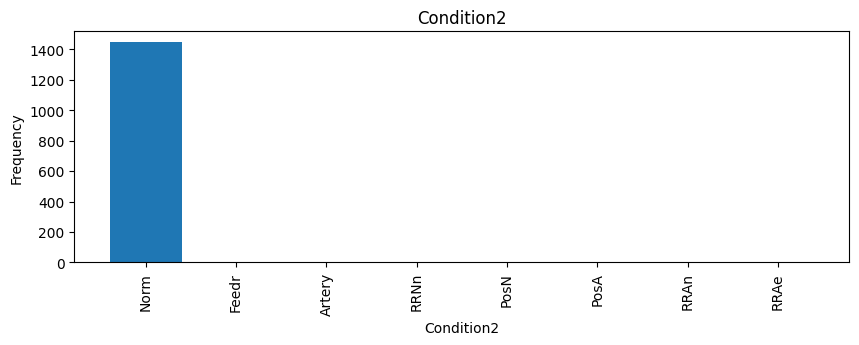

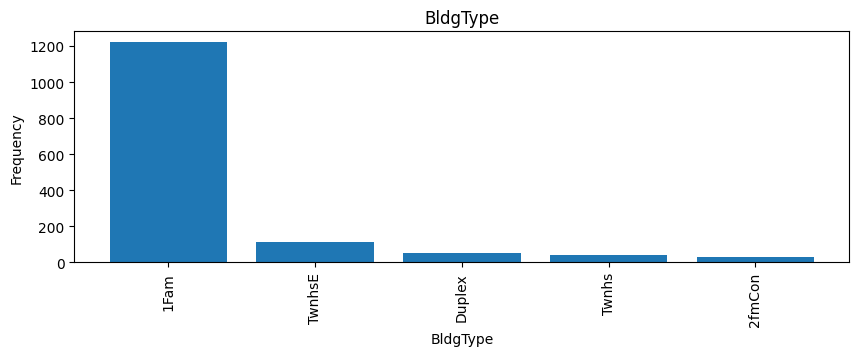

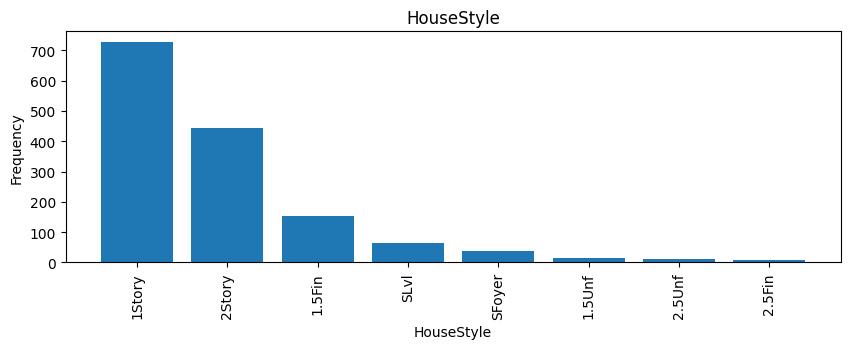

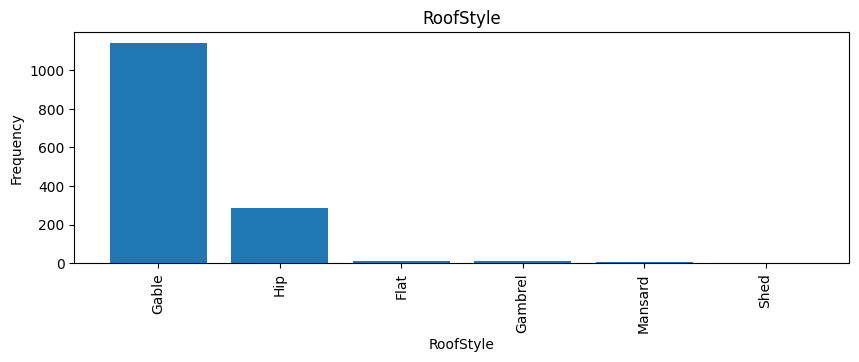

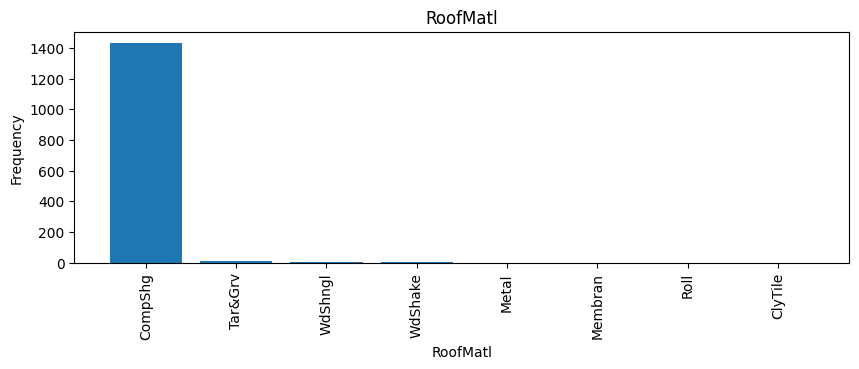

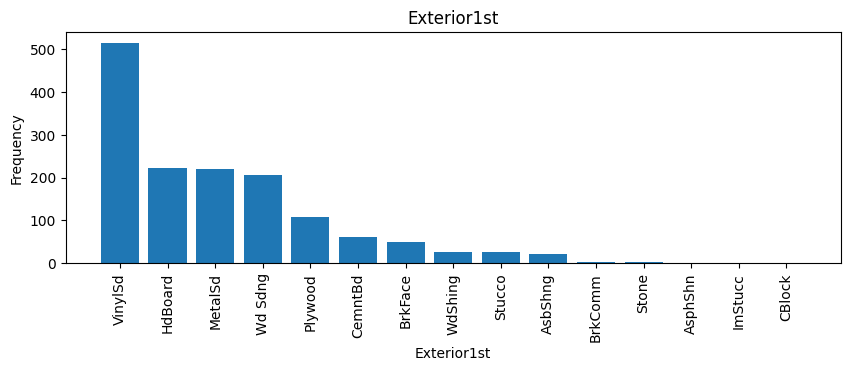

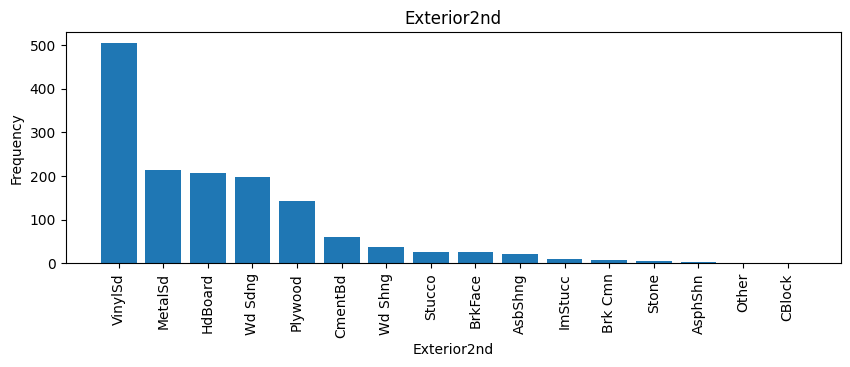

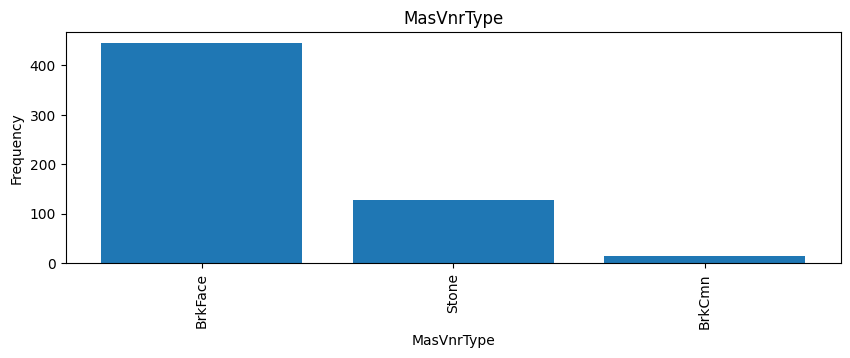

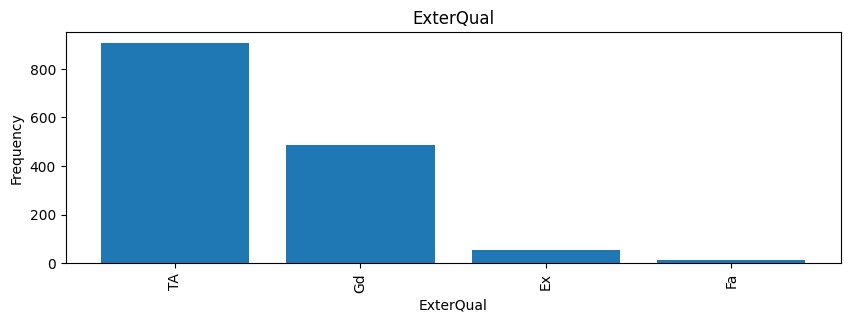

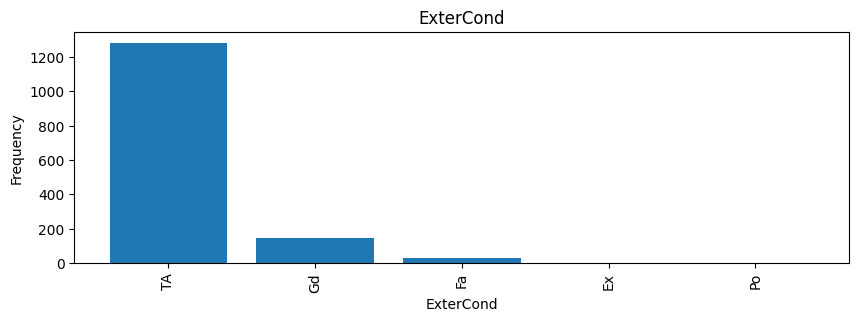

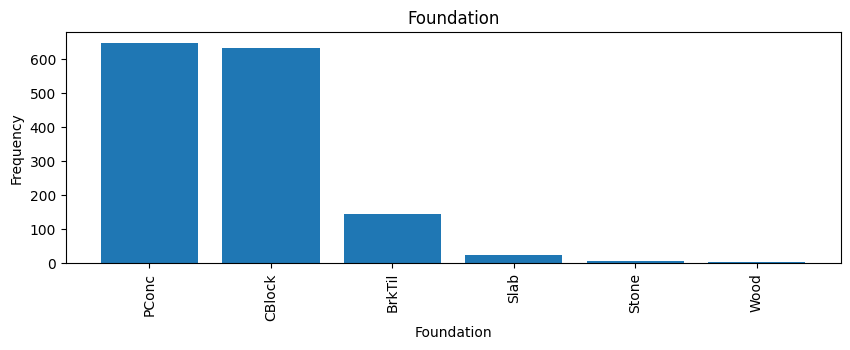

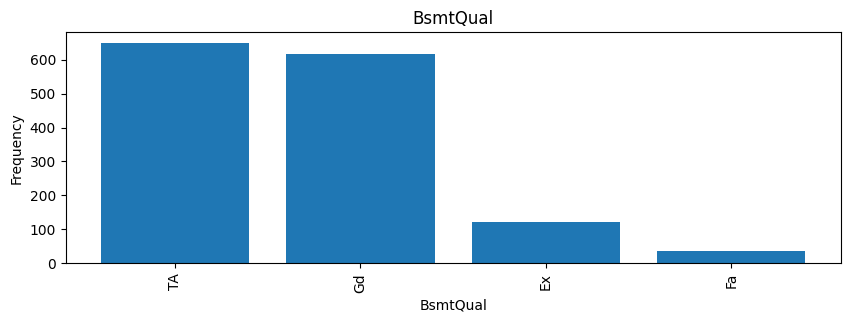

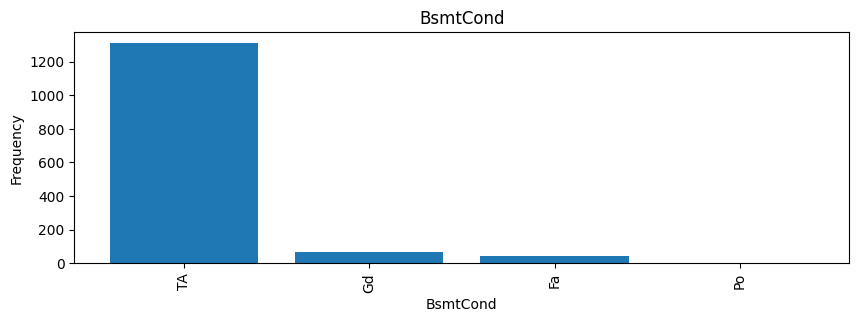

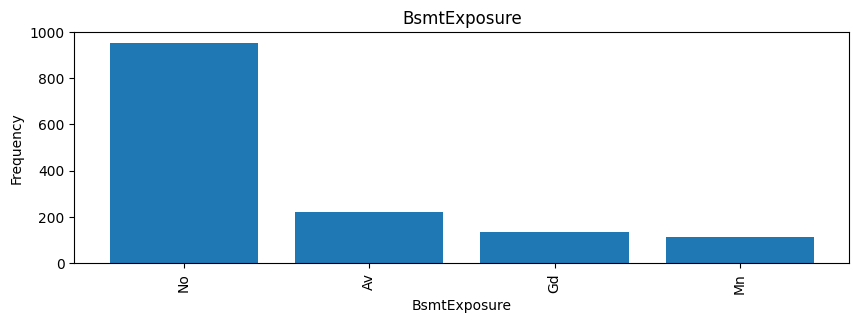

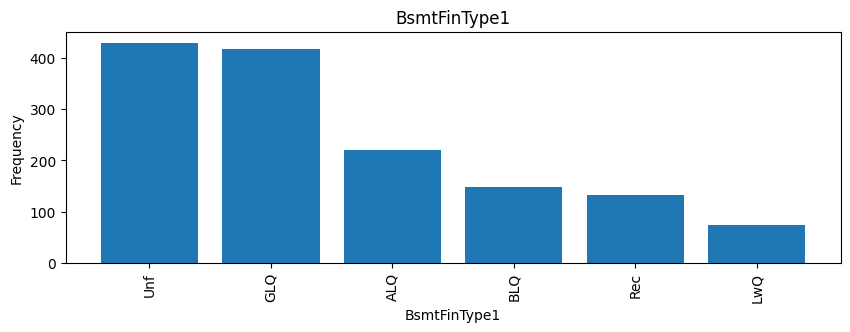

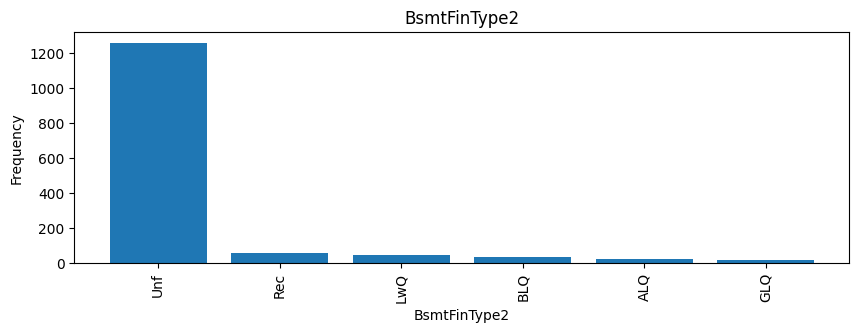

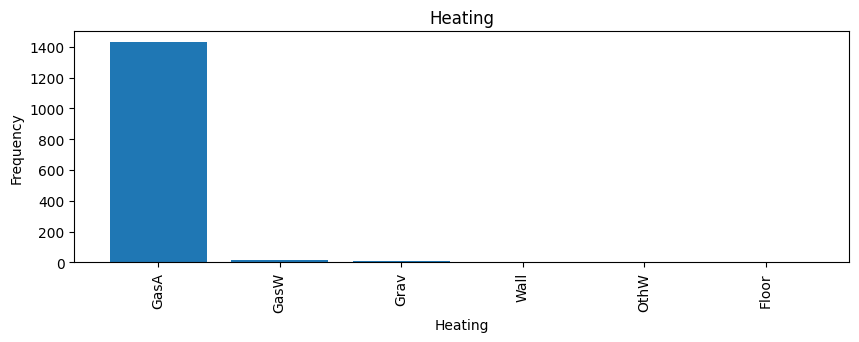

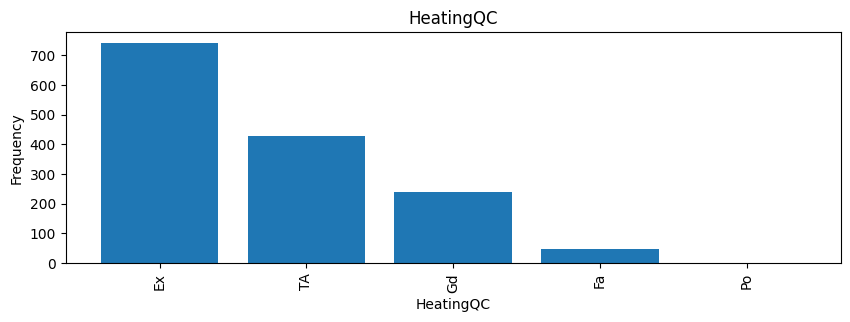

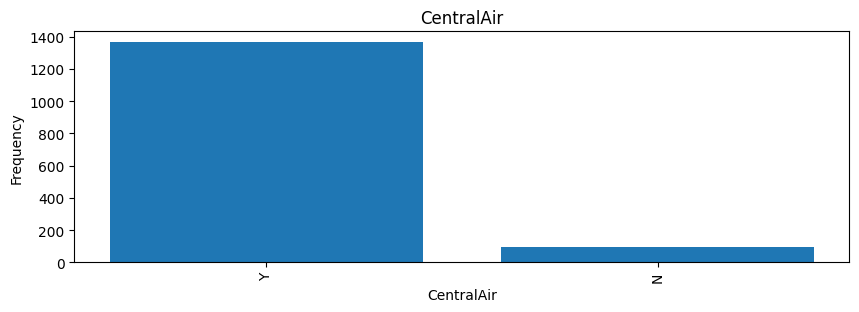

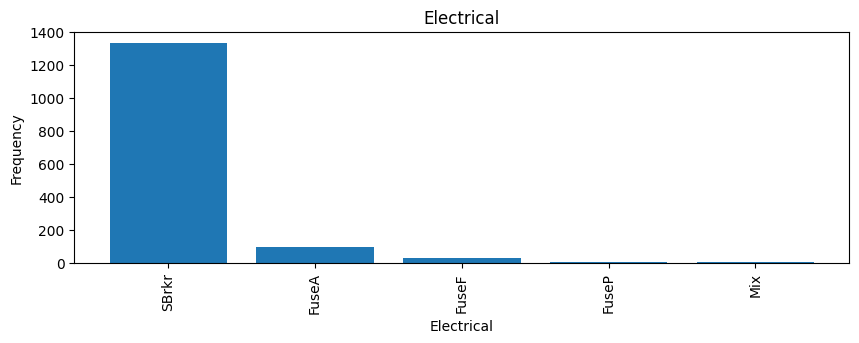

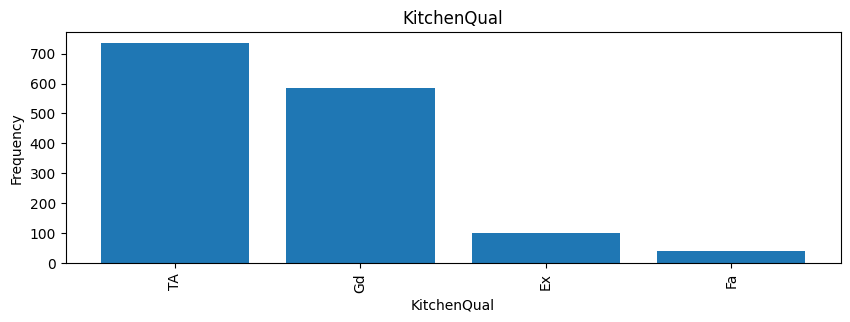

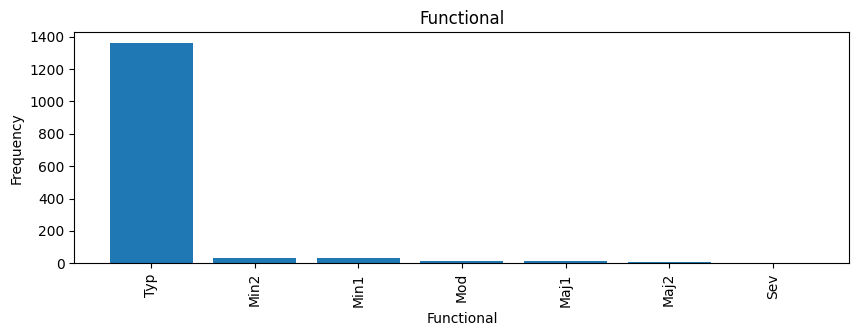

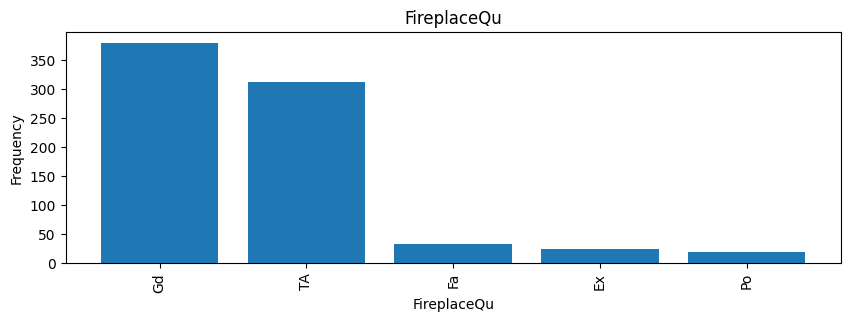

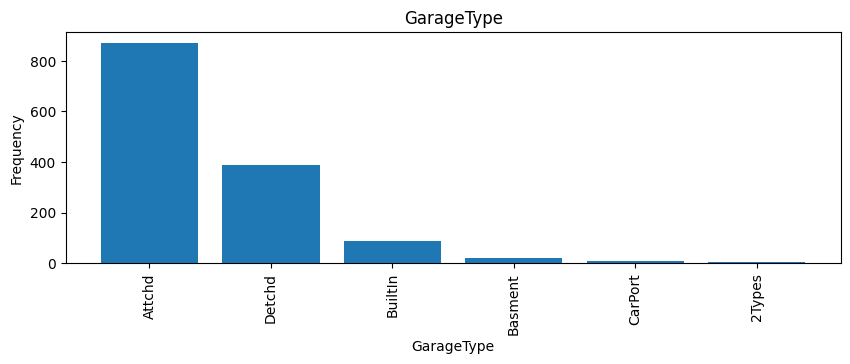

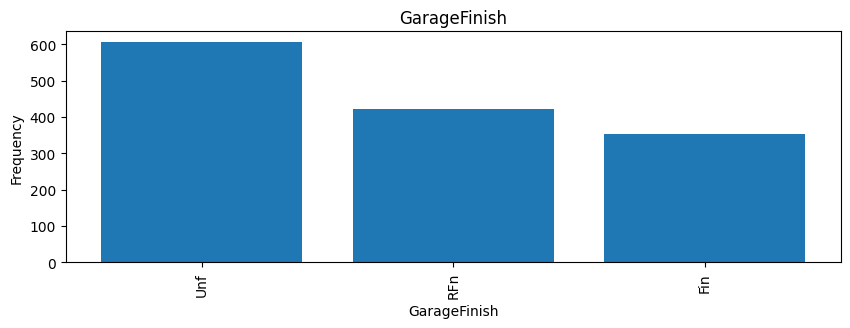

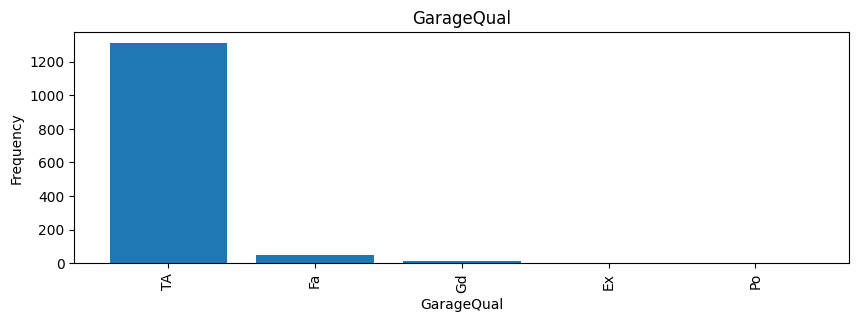

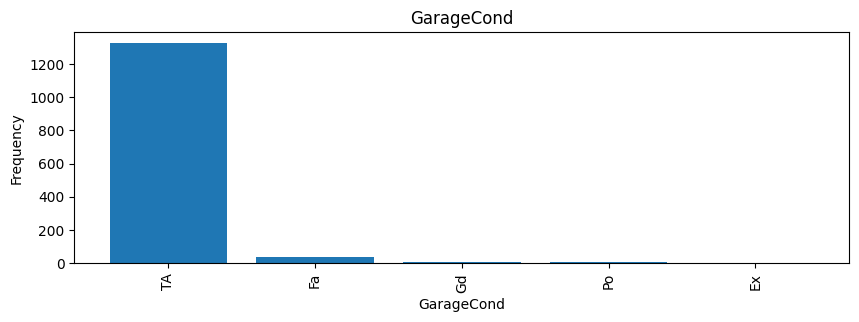

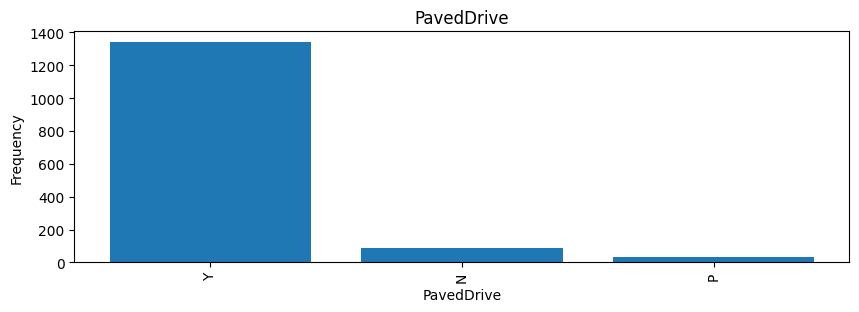

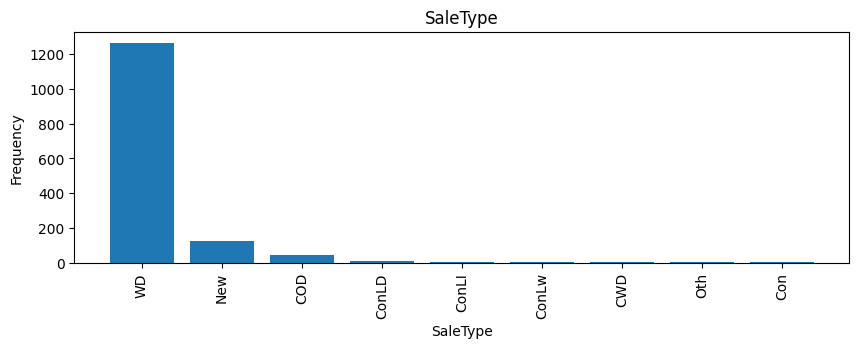

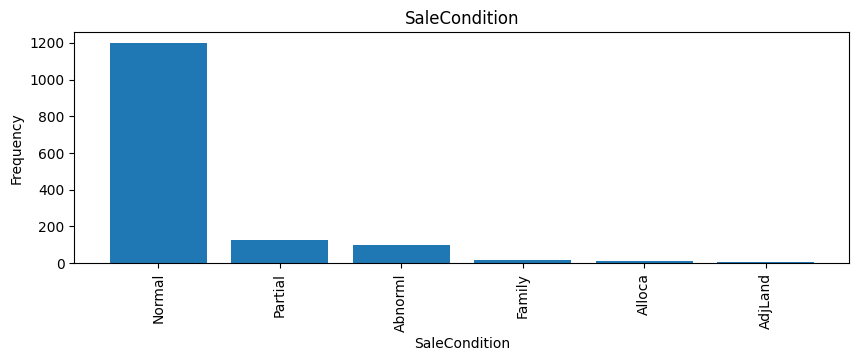

In [150]:
for col in categorical_variables:
    plt.figure(figsize=(10, 3))
    value_counts = df[col].value_counts() #start by counting the unique values for each categorical variable to be able to plot it
    plt.bar(value_counts.index, value_counts.values)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Based on these barplots, we can still observe that FireplaceQu and Bsmt-related variables have a large number of missing values.

Additionally, MSZoning has a majority of values in the RL category, which impacts the skewness of the dataset.

Moving forward, we will conduct further bivariate and multivariate analysis now that we have a stronger understanding of each variable's relevance to the sales price.

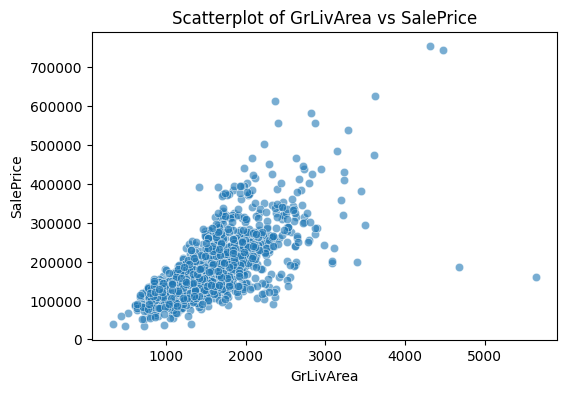

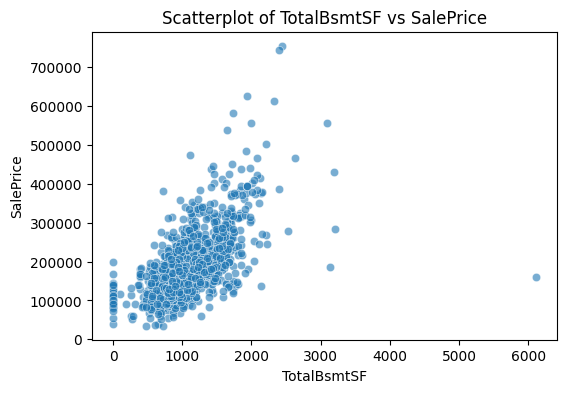

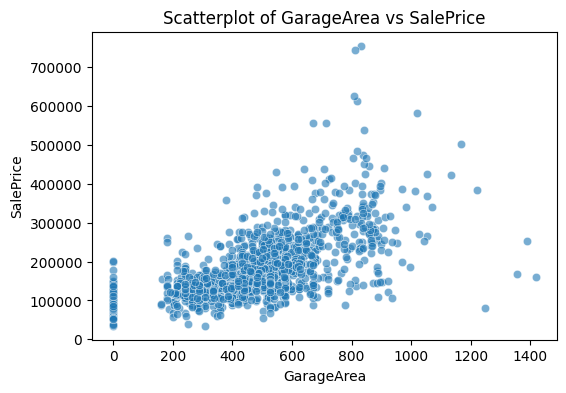

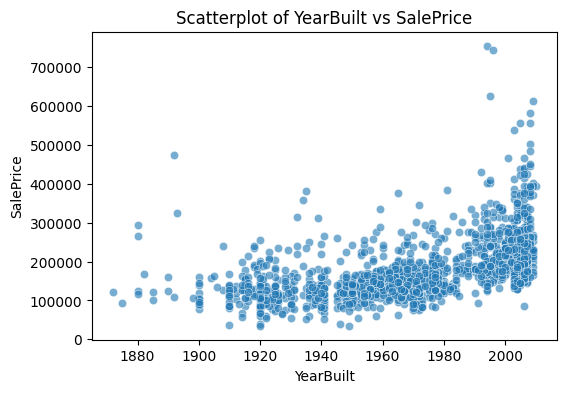

In [151]:
scatter_features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "YearBuilt"] #selected key features that may impact the sales price

#create for loop to create scatterplots
for col in scatter_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y="SalePrice", alpha=0.6)
    plt.title(f"Scatterplot of {col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

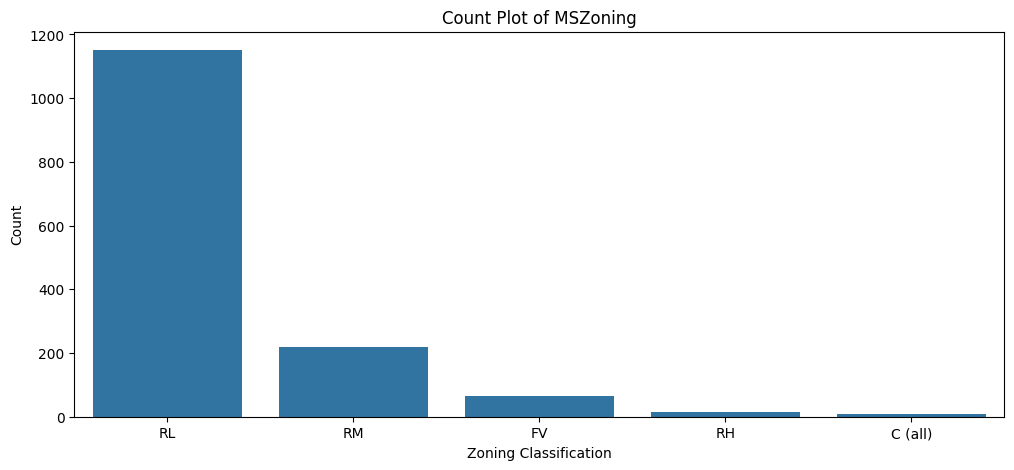

In [152]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="MSZoning", order=df["MSZoning"].value_counts().index)
plt.title("Count Plot of MSZoning")
plt.xlabel("Zoning Classification")
plt.ylabel("Count")
plt.show()

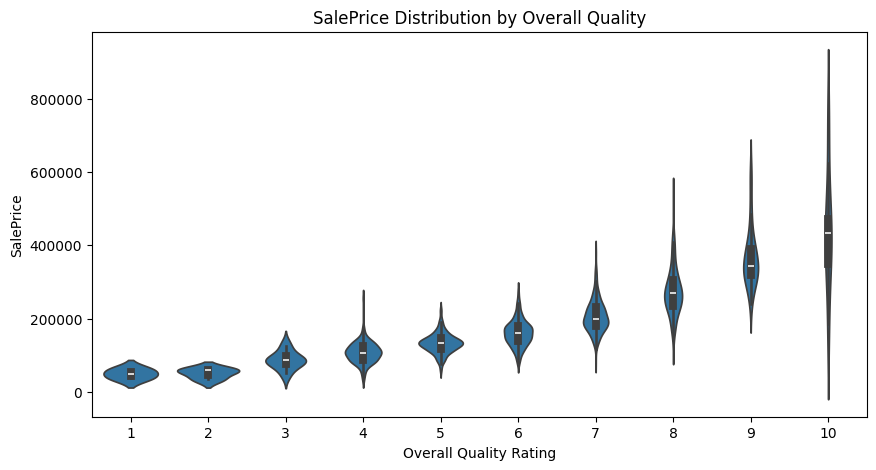

In [153]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="OverallQual", y="SalePrice")
plt.title("SalePrice Distribution by Overall Quality")
plt.xlabel("Overall Quality Rating")
plt.ylabel("SalePrice")
plt.show()

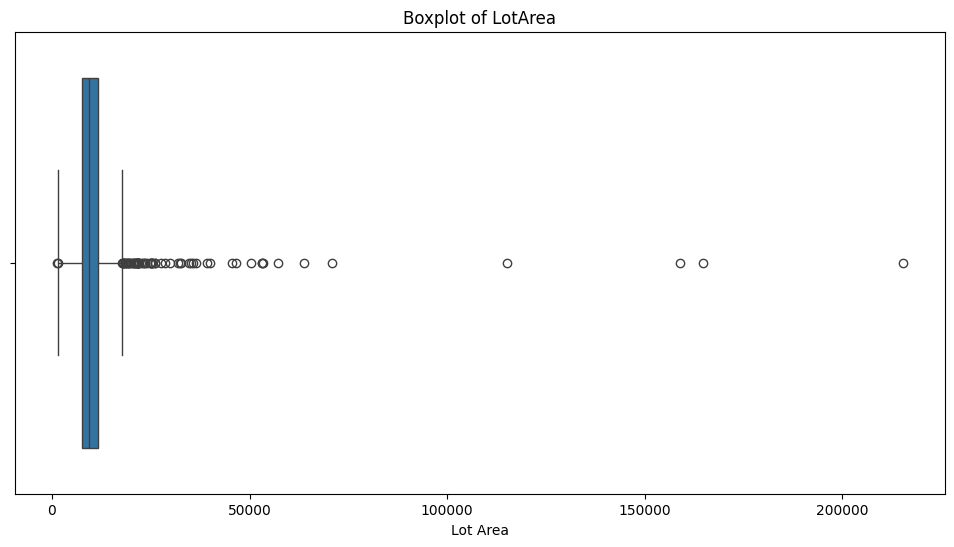

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="LotArea")
plt.title("Boxplot of LotArea")
plt.xlabel("Lot Area")
plt.show()

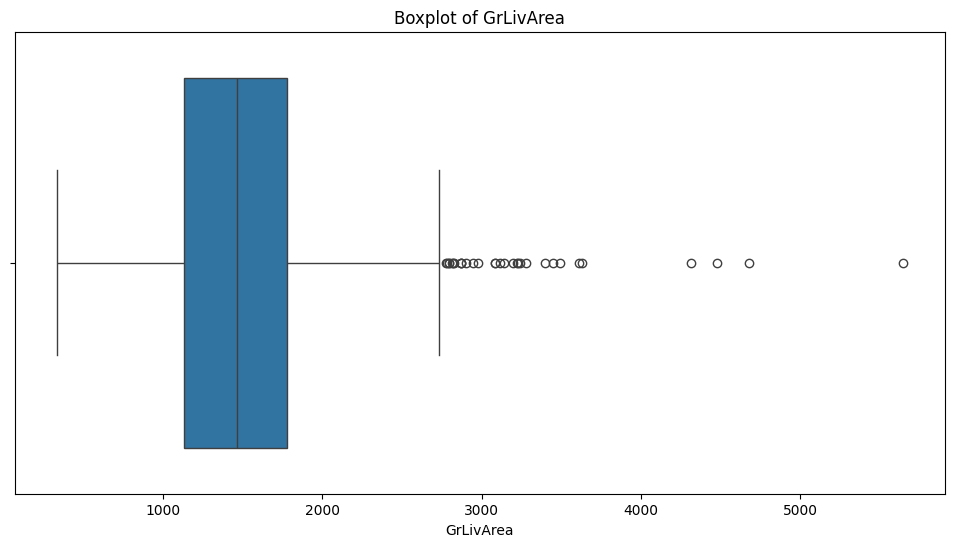

In [155]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="GrLivArea")
plt.title("Boxplot of GrLivArea")
plt.xlabel("GrLivArea")
plt.show()

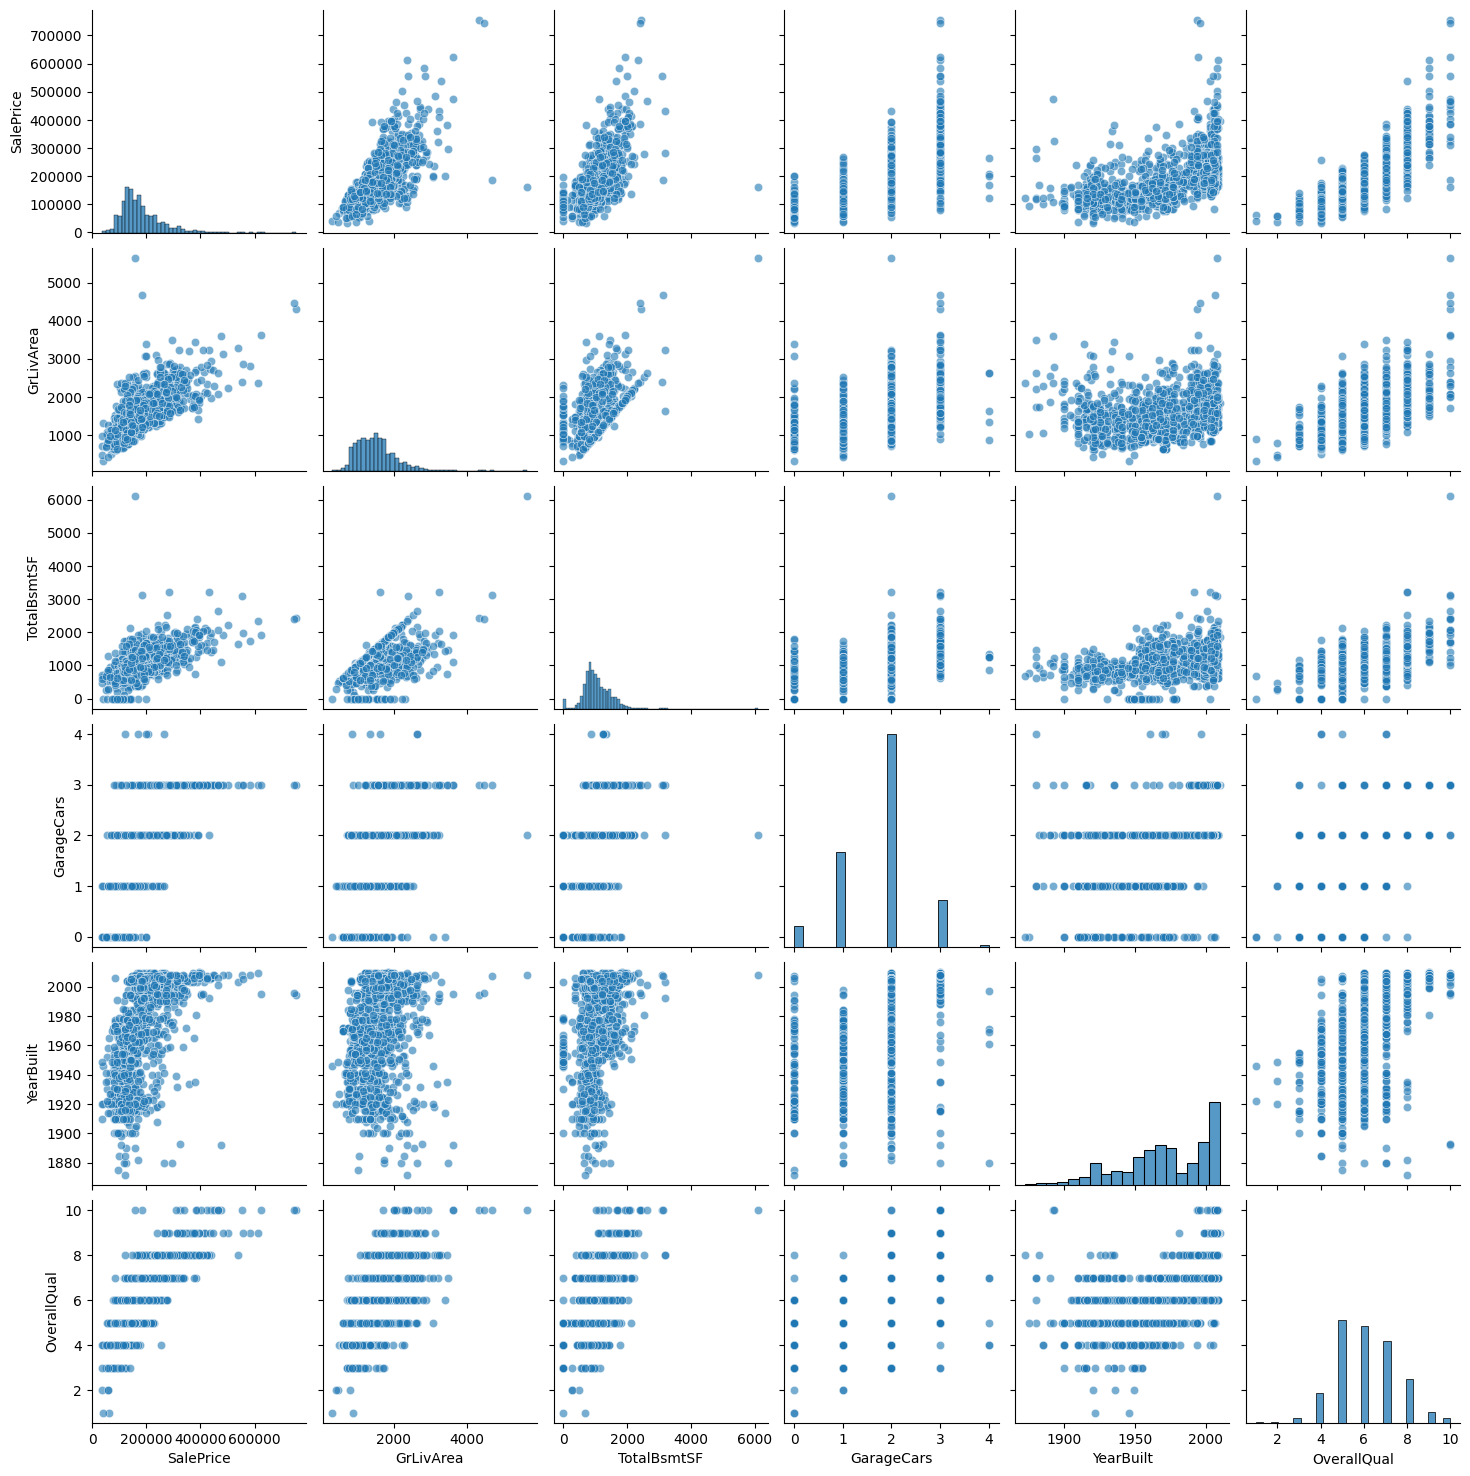

In [156]:
# Select key numerical features for the pairplot
pairplot_features = ["SalePrice", "GrLivArea", "TotalBsmtSF", "GarageCars", "YearBuilt", "OverallQual"]

# Create a pairplot
sns.pairplot(df[pairplot_features], diag_kind="hist", plot_kws={'alpha':0.6})

# Show the plot
plt.show()

**Part 2: Pre-Processing**
Now that we have an increased understanding of the relationships between variables and taken note of potential outliers and missing values, we can begin cleaning the data.

For missing data, we already dropped columns that had more then 70% missing values in them, for the remaining ones, we will inpute as needed.

In [157]:
#starting with categorical, we will replace missing values with "None", since most of these, like garage, basement, and fireplace, mean there is none of those features if the value is missing.

categorical_columns = df.select_dtypes(exclude=[np.number]).columns
df[categorical_columns] = df[categorical_columns].fillna("None")
df[categorical_columns].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [158]:
#for numerical values, we will start by analyzing with numerical variables still have missing data
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].isnull().sum().sort_values(ascending=False).head(5)

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
GarageCars,0
HalfBath,0


In [159]:
#for Lot Frongtage, GarageYrBlt, and MasVnrArea, we know these three variables are heavily skewed. To prevent inputation from affecting the statistical performance of our machine learning model, we must use the median.

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [160]:
#we will now run a report for the whole data set to see if there are any missing values left

missing_report = pd.DataFrame({
    "Percent Missing": df.isnull().sum()/len(df)*100
})

missing_report.sort_values(by="Percent Missing", ascending=False)

,Percent Missing
MSSubClass,0.0
Heating,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
...,...
MasVnrArea,0.0
MasVnrType,0.0
Exterior2nd,0.0
Exterior1st,0.0


Now that we have successfully inputed and removed missing values, we can proceed with handling outliers in the data set. We can use an "Outlier Report" to generate a statistical sense of all the outliers in the dataset.

In [161]:
# Function to detect outliers using IQR and provide full statistical details
def detect_outliers_with_stats(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Store statistical details
    stats = {
        "Feature": column,
        "Outlier Count": len(outliers),
        "Lower Bound": round(lower_bound, 2),
        "Upper Bound": round(upper_bound, 2),
        "Mean": round(df[column].mean(), 2),
        "Standard Deviation": round(df[column].std(), 2),
        "Outlier Values": outliers[column].tolist()
    }

    return stats

# Select numerical columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Store detailed outlier analysis
outlier_analysis = []
for col in numerical_cols:
    outlier_info = detect_outliers_with_stats(df, col)
    outlier_analysis.append(outlier_info)

# Convert to DataFrame
outlier_report_df = pd.DataFrame(outlier_analysis)

outlier_report_df

,Feature,Outlier Count,Lower Bound,Upper Bound,Mean,Standard Deviation,Outlier Values
0,MSSubClass,103,-55.00,145.00,56.90,42.30,"[190, 190, 160, 180, 160, 190, 160, 190, 160, ..."
1,LotFrontage,106,31.50,107.50,69.86,22.03,"[110.0, 108.0, 112.0, 115.0, 110.0, 24.0, 21.0..."
2,LotArea,69,1481.50,17673.50,10516.83,9981.26,"[50271, 19900, 21000, 21453, 19378, 31770, 229..."
3,OverallQual,2,2.00,10.00,6.10,1.38,"[1, 1]"
4,OverallCond,125,3.50,7.50,5.58,1.11,"[8, 8, 8, 2, 3, 8, 8, 8, 8, 9, 8, 9, 9, 3, 9, ..."
5,YearBuilt,7,1885.00,2069.00,1971.27,30.20,"[1880, 1880, 1880, 1882, 1880, 1875, 1872]"
6,YearRemodAdd,0,1911.50,2059.50,1984.87,20.65,[]
7,MasVnrArea,98,-246.38,410.62,103.12,180.73,"[640.0, 650.0, 412.0, 456.0, 1031.0, 573.0, 11..."
8,BsmtFinSF1,7,-1068.38,1780.62,443.64,456.10,"[1810, 1880, 1904, 2260, 2188, 2096, 5644]"
9,BsmtFinSF2,167,0.00,0.00,46.55,161.32,"[32, 668, 486, 93, 491, 506, 712, 362, 41, 169..."


Based on this report, we can target our approach for certain outliers and how to proceed.

* Lot Area - has 98 outliers, where rows above 17673.50 can be removed, as anything above is extreme.
* LotFrontage - any oversized lots, rows above 107.50, should be removed as they are rare in the dataset
* MasVnrArea - should be logged due to luxury properties in the dataset having veneer in square feet that is extreem
* OverallQual - since this is categorical, all values should be kept
* YearBuilt - since this is categorical, and the extreme values are simply the existence of historical homes, all values should be kept, instead binning should be considered to group homes into categories
* GrLivArea - extreme values over 2747 exist, but are not a significant amount of data, so logging should suffice
* GarageArea - should be tested for correlation with sales price
* SalePrice - has large outliers well over $340,000, so to prevent luxury homes from heavily skewing the data, it should be logged



**Part 3: Collinearity**
To visualize collinearity, we will create a correlation matrix between all variables and keep note of which should be considered for feature selection.

In [162]:
df_numeric = df.select_dtypes(include=[np.number]) #selecting numeric columns in a df
corr_matrix = df_numeric.corr() #create correlation matrix
print(corr_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808   

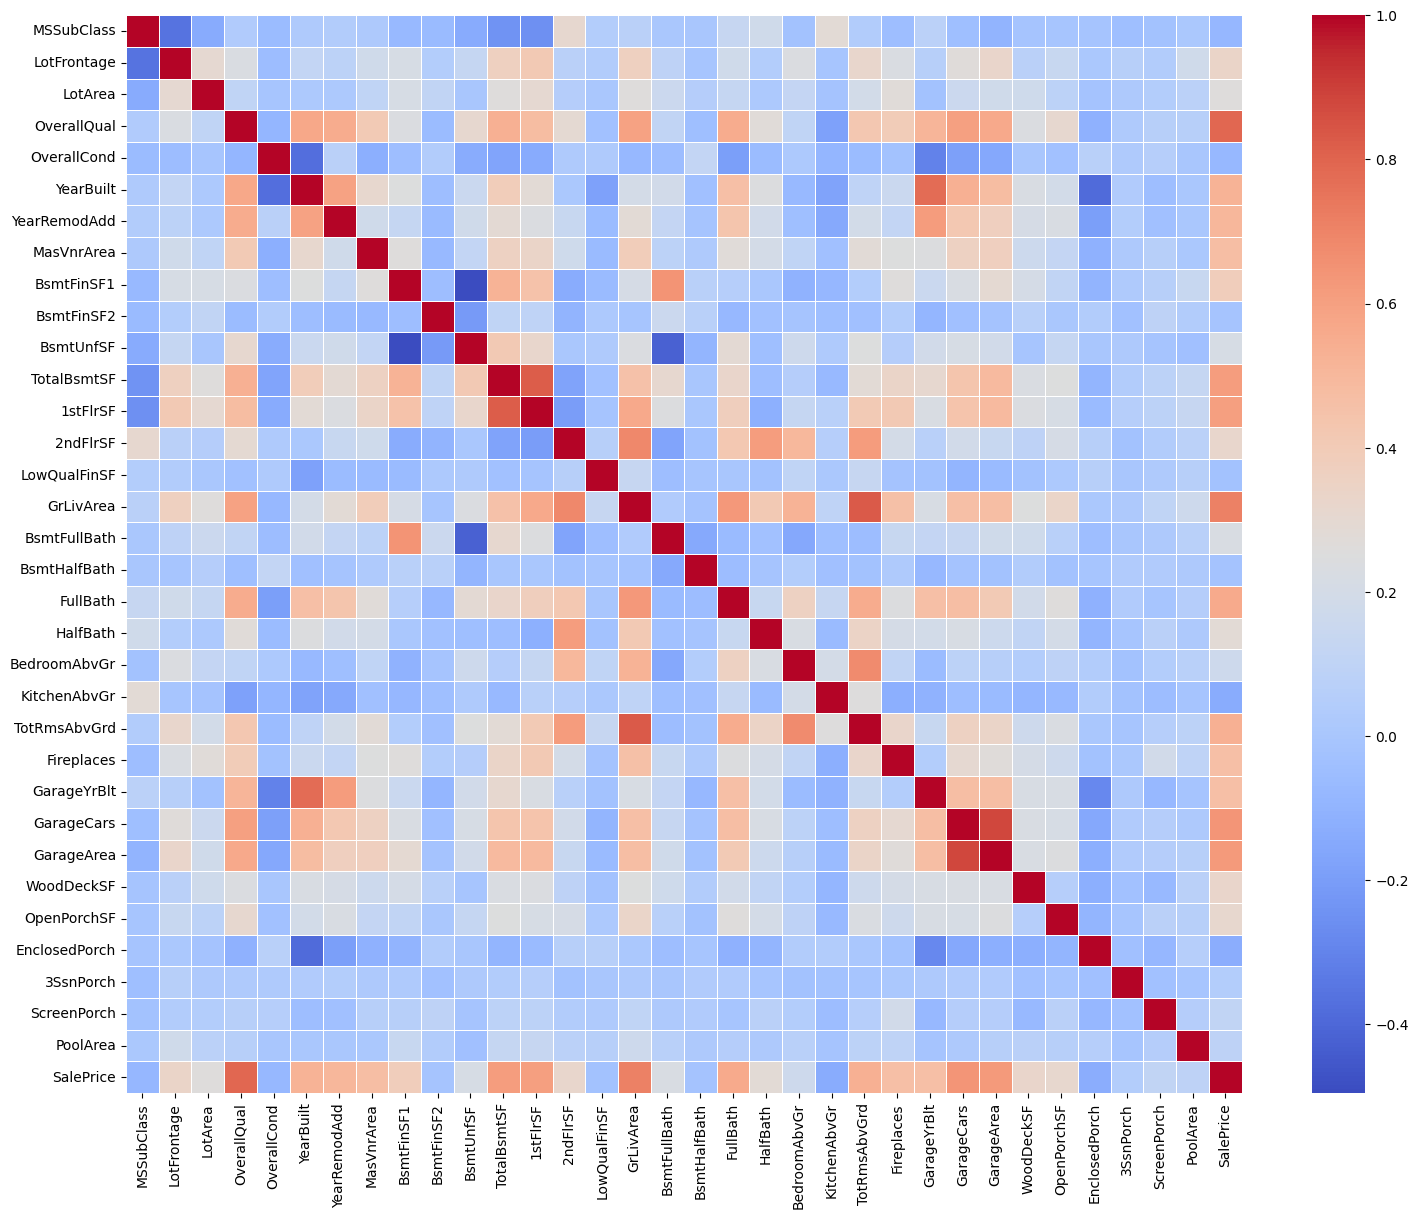

In [163]:
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5) #remove annotations for improved visibility
plt.show()

Several variables, such as GarageYrBlt and Year Built seem to have a strong relationship. To improve our understanding of these relationships, we'll create a list of all high-correlation pairings.

In [164]:
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]
high_corr = high_corr[high_corr.index.get_level_values(0) != high_corr.index.get_level_values(1)]
high_corr.head(15)

,,0
GarageCars,GarageArea,0.882475
GarageArea,GarageCars,0.882475
TotRmsAbvGrd,GrLivArea,0.825489
GrLivArea,TotRmsAbvGrd,0.825489
1stFlrSF,TotalBsmtSF,0.819530
TotalBsmtSF,1stFlrSF,0.819530
SalePrice,OverallQual,0.790982
OverallQual,SalePrice,0.790982
GarageYrBlt,YearBuilt,0.777182
YearBuilt,GarageYrBlt,0.777182
